# Hist 3368 Week 4 - Using Wordnet to Study Congress

The notebook below generates some visualizations of a controlled vocabulary of crime, applying the findings from Wordnet to Jane Austen and Congress.

In [69]:
import nltk, numpy, re, matplotlib
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import matplotlib.pyplot as plt

### Load the Controlled vocabulary on crime that we generated earlier this week.

In [70]:
cd ~/digital-history

/users/jguldi/digital-history


You should have a file called "crime_vocab.csv" that we created in an earlier notebook using Wordnet.  Load it now.

In [71]:
vocab = pd.read_csv("crime_vocab.csv").drop(['Unnamed: 0'], 1)
vocab = list(vocab['word'])

This may take a minute.

### Load Austen Data

In [72]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


In [73]:
with open('senseandsensibility.txt', 'r') as myfile:
    sas_data = myfile.read().split('\n\n"I suppose you know, ma\'am, that Mr. Ferrars is married"\n\nIt _was_ Edward\n\n"Everything in such respectable condition"\n\n ')[1].split('THE END')[0].strip()
with open('emma.txt', 'r') as myfile:
    emma_data = myfile.read().split('CHAPTER I')[1].split('FINIS')[0].strip()
with open('prideandprejudice.txt', 'r') as myfile:
    pap_data = myfile.read().split('CHAPTER I')[1].split('End of the Project Gutenberg EBook of Pride and Prejudice, by Jane Austen')[0].strip()
data = [sas_data, emma_data, pap_data]

# clean up
austenwords = []
for novel in data:
    novel = re.sub('[\",.;:?([)\]_*]', '', novel) # strip punctuation
    novel = re.sub('-', ' ', novel) # replace hyphens with spaces
    novelwords = novel.replace('\n', ' ').lower().split() # remove whitespace, lowercase, split into words
    austenwords += novelwords

### Find Vocab Matches in Jane Austen

In [83]:
# search for matched words
matchedwords = []
for w in austenwords:
    w = wn.morphy(w) # lemmatize it
    if w in vocab:
        matchedwords.append(w)
matchedwords
pd.Series.value_counts(matchedwords)[:5]

off        62
attempt    39
remove     31
wrong      24
liberty    19
dtype: int64

In [96]:
# collect the bigrams in the controlled vocabulary
cleanwordnetbigrams = []
for v in vocab:
    if " " in v:
        cleanwordnetbigrams.append(v)
cleanwordnetbigrams[:5]

['criminal offense',
 'criminal offence',
 'law breaking',
 'aggravated assault',
 'assault and battery']

In [99]:
# search for matched bigrams
matchedbigrams = []
from textblob import TextBlob
for novel in data:
    novel = re.sub('[\",.;:?([)\]_*]', '', novel) # strip punctuation
    novel = re.sub('-', ' ', novel) # replace hyphens with spaces
    novelwords = novel.replace('\n', ' ').lower() # remove whitespace, lowercase, split into words
    bigrams = TextBlob(novelwords).ngrams(n=2)
    for bigram in bigrams: # move through each line of the *bigrams* list
        if wn.morphy(bigram[0]) is not None and wn.morphy(bigram[1]) is not None:
            bigram2 = wn.morphy(bigram[0]) + ' ' + wn.morphy(bigram[1]) # call the first word, a space, and the second word into a new string
            if bigram2 in cleanwordnetbigrams:
                matchedbigrams.append(bigram2) # save the string 
pd.Series.value_counts(matchedbigrams)[:5]

take in     2
break in    2
dtype: int64

In [101]:
# put it all together 
allcontrolledvocab = matchedwords + matchedbigrams  

# stopword out ambiguous words
ambiguouswords = ['break in', 'off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid', 'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical', 'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']
finallist = []
for v in allcontrolledvocab:
    if v not in ambiguouswords:
        finallist.append(v)
finalcount = pd.Series.value_counts(finallist)
finalcount[:5]

evil       17
offence    14
torture     6
attack      6
injury      5
dtype: int64

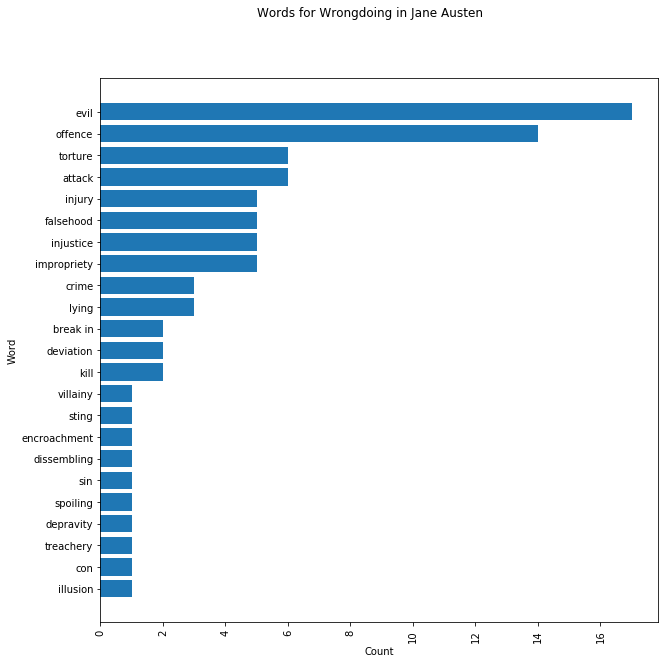

In [102]:
#######
# a well-labeled barplot
plt.figure(figsize = (10, 10)) # make it medium and square
plt.barh(finalcount.index, finalcount) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Jane Austen') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('austen-wrongdoing.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

### Load Congress Data

In [103]:
cd ~/digital-history 

/users/jguldi/digital-history


In Canvas, there is a link to a file called  **"congress-just-1967-and-2010.csv"**.  Download it from Canvas.  

Upload the file to your digital-history folder in the left-hand sidebar. 

Use the command below, **read_csv**, to read in the data.

This may take a minute.

In [104]:
congress = pd.read_csv("congress-just-1967-and-2010.csv")

In [105]:
congress1 = congress[congress['year'] == 1967]
congress2 = congress[congress['year'] == 2010]

### Clean the Data

In [108]:
# clean up speeches from 1967
congressspeeches1 = []
for speech in congress1['speech']:
    speech = re.sub('[\",.;:?([)\]_*]', '', speech) # strip punctuation
    speech = re.sub('-', ' ', speech) # replace hyphens with spaces
    speech = speech.lower()
    congressspeeches1.append(speech)
congressspeeches1 = ' '.join(congressspeeches1)
congressspeeches1[:50]

'those who do not enjoy the privilege of the floor '

In [109]:
# clean up speeches from 2010
congressspeeches2 = []
for speech in congress2['speech']:
    speech = re.sub('[\",.;:?([)\]_*]', '', speech) # strip punctuation
    speech = re.sub('-', ' ', speech) # replace hyphens with spaces
    speech = speech.lower() # lower case 'em '
    congressspeeches2.append(speech) # save the speeches for later
congressspeeches2 = ' '.join(congressspeeches2)
congressspeeches2[:50]

'the clerk will please read a communication to the '

### Match Congress Words with the Controlled Vocab

In [110]:
# match lemmatized words from 1967
matchedwords1 = []
congresswords1 = congressspeeches1.split() # split into words   
for word in congresswords1: 
    word = wn.morphy(word) # lemmatize 'em'
    if word is not None:
        if word in vocab: # see if the word is in the vocabulary
            matchedwords1.append(word)
print(matchedwords1[:10])

['gore', 'vice', 'vice', 'vice', 'fall', 'tribute', 'job', 'job', 'tribute', 'tribute']


In [111]:
# match lemmatized words from 2010
matchedwords2 = []
congresswords2 = congressspeeches2.split() # split into words    
for word in congresswords2: 
    word = wn.morphy(word) # lemmatize 'em'
    if word is not None:
        if word in vocab: # see if the word is in the vocabulary
            matchedwords2.append(word)
print(matchedwords2[:10])

['off', 'off', 'protection', 'job', 'kill', 'job', 'off', 'job', 'job', 'job']


### Find Vocab Matches in Congress

Congress is bigger, so we have to use slightly more efficient code.  The lines below do the same as those above, but we use 'list comprehension' grammar:
    
    word for word in list1 if word in list2

This is the equivalent of a for loop:

    for word in list1:
        if word in list2:
            word


First, fine the controlled vocab match in words and bigrams for 1967 and plot the top instances.

In [112]:
# search for matched words
setvocab = set(vocab)
matchedwords1 = [word for word in congresswords1 if word in setvocab]

In [113]:
# we'll use a slightly different method for finding ngrams because it's faster with big data than TextBlob.ngrams()
def zipngram(text, n=2):
    words = text.split()
    return zip(*[words[i:] for i in range(n)])

In [114]:
# search for matched bigrams
bigrams = zipngram(congressspeeches1)
matchedbigrams1= [' '.join(bigram) for bigram in bigrams if ' '.join(bigram) in setvocab]

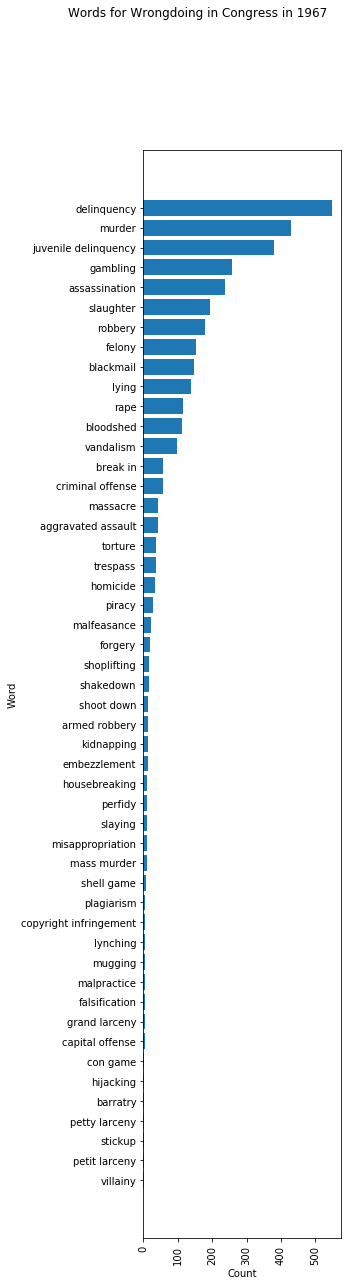

In [115]:
# put it all together and stopword out ambiguous words
allcontrolledvocab1 = matchedwords1 + matchedbigrams1
ambiguouswords = ['infringement', 'setup', 'mischief', 'foul', 'illusion','encroachment', 'misdemeanor','unfairness', 'pretense','sophistication', 'deceit',
                  'disservice','fabrication', 'equivocation','falsehood','usurpation','violation', 'injury', 'injustice', 'carnage', 'betrayal','evil', 
                  'hell', 'offense','deviation', 'impropriety','indirection','pretending','duplicity', 'delusion','trickery','shrinkage','transgression',
                  'spoiling', 'indecency','depravity','sin','slay','butchery','molestation','mortal sin','guile','abomination','malicious mischief',
                  'treason','treachery','inroad','offence','foul play','perpetration','wile','iniquity','committal','brutalization','infliction','falsify','hooliganism','impersonation',
                    'sinning','fakery', 'hustle', 'mangle','intemperance', 'foul ball','fratricide','monkey business','terrorization','pilferage','gyp',
                  'pyramiding','obscenity','holdup', 'wickedness','nonfeasance','abnormality','law breaking','mutilate','caper','ill turn','frame up',
                  'prevarication','thuggery','immorality','perversion','rascality','quackery','double dealing','con','fraud','shenanigan','roguery','high treason',
                  'cheating','off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid','misfeasance',
                  'attack','assault','sting','indiscretion','vice','crime','snatch','infraction','misapplication','kill','irregularity','flimflam','chicanery',
                  'sellout','twisting','blaze','straining','misbehavior','warp','spoilage','tort','simulation','turpitude','dereliction','mayhem', 'dishonesty',
                  'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical',
                  'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 
                  'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']
finallist1 = [w for w in allcontrolledvocab1 if w not in ambiguouswords]
finalcount1 = pd.Series.value_counts(finallist1)[:50]

#######
# a well-labeled barplot
plt.figure(figsize = (5, 20)) # make it tall and thin
plt.gcf().subplots_adjust(left=0.35) # pad the left margin so that the labels don't get cut off
plt.barh(finalcount1.index, finalcount1) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Congress in 1967') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('congress-wrongdoing-1967.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

Do the same thing for 2010.

In [116]:
# search for matched words
setvocab = set(vocab)
matchedwords2 = [word for word in congresswords2 if word in setvocab]

In [117]:
# search for matched bigrams
bigrams = zipngram(congressspeeches2)
matchedbigrams2= [' '.join(bigram) for bigram in bigrams if ' '.join(bigram) in setvocab]

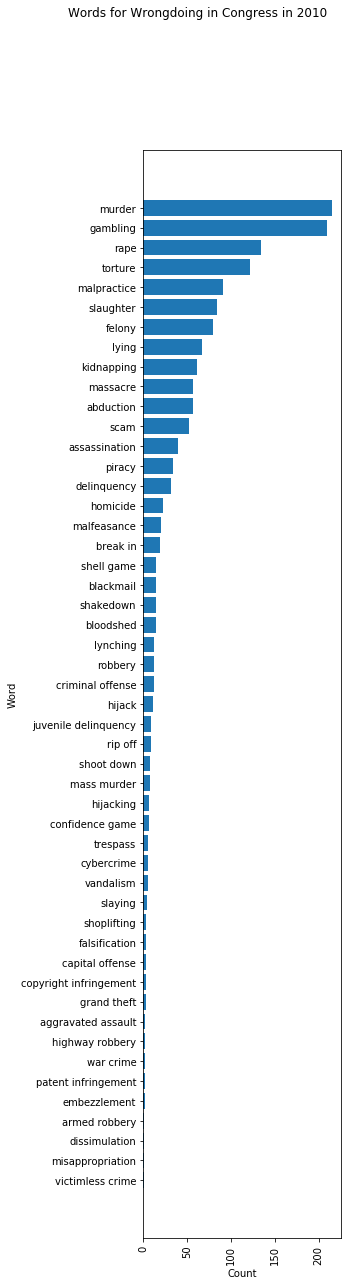

In [118]:
# put it all together and stopword out ambiguous words
allcontrolledvocab2 = matchedwords2 + matchedbigrams2
finallist2 = [w for w in allcontrolledvocab2 if w not in ambiguouswords]
finalcount2 = pd.Series.value_counts(finallist2)[:50]

#######
# a well-labeled barplot
plt.figure(figsize = (5, 20)) # make it tall and thin
plt.barh(finalcount2.index, finalcount2) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.gcf().subplots_adjust(left=0.35) # pad the left margin so that the labels don't get cut off
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Congress in 2010') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('congress-wrongdoing-2010.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

## Assignment

Use the visualizations included here to answer the following essay questions.  Turn in a word document with well-formatted answers.

1) What kinds of crimes concern Austen?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

2) Compare and contrast wrongdoing in Jane Austen and wrongdoing in Congress.  Why were a novelist from 1800 and lawmakers after 1967 concerned with different offenses?

3) What kinds of crimes concerned Congress in 1967?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

4) What kinds of crimes concerned Congress in 2010?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

5) Compare and contrast wrongdoing in Congress in 1980 with wrongdoing in Congress in 1989. Be specific. Write about as many words as possible. What might explain this historical change of focus?

